# BANK-MAKETING ANALYSIS

### Análise Exploratória

<img src="images/telemarketing.png">
<br><hr><br>


Com o objetivo de modelar a efetividade da campanha de marketing do Banco Banco S.A., apresenta-se aqui uma exploração das variáveis levantadas referentes à [última campanha realizada](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

##### Consultores:

- Anderson 
- Caio Viera
- Pedro Correia

A seguir, a descrição de cada uma das variáveis disponíveis:

### Input variables:
#### bank client data:

   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
   3. marital : marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
   5. default: has credit in default? (categorical: "no", "yes", "unknown")
   6. housing: has housing loan? (categorical: "no", "yes", "unknown")
   7. loan: has personal loan? (categorical: "no", "yes", "unknown")

#### related with the last contact of the current campaign:

   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
#### other attributes:
  
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
#### social and economic context attributes
   
   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric)     
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)
   
### Output variable (desired target):
  
   21. y - has the client subscribed a term deposit? (binary: "yes","no")


### Missing Attribute Values: 
There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

<hr>
### Incializando o ambiente
- Importando Bibliotecas
- Carregando os dados

In [1]:
# importando as bibliotecas utilizadas nessa

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
cp = sns.color_palette()
%matplotlib inline

# extras
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
# carregando os dados
data_path = 'data/historical-data.csv'
data = pd.read_csv(data_path, sep=';')
data.columns = data.columns.str.replace('.', '_')
data['y'] = data['y_numeric']
data.drop("y_numeric", axis=1, inplace=True)
print(f"""
Dataset: {data_path} carregado:
  - {data.shape[1]} colunas
  - {data.shape[0]} linhas
""")


Dataset: data/historical-data.csv carregado:
  - 21 colunas
  - 37069 linhas



In [3]:
# observando amostra dos dados
data.sample(5).T

,11852,18277,13845,30502,26012
age,30,29,34,35,54
job,technician,admin.,blue-collar,management,admin.
marital,single,single,married,married,married
education,professional.course,university.degree,basic.9y,university.degree,university.degree
default,no,no,unknown,unknown,no
housing,unknown,no,yes,yes,yes
loan,unknown,yes,yes,no,no
contact,telephone,cellular,telephone,cellular,cellular
month,sep,aug,may,aug,mar
day_of_week,tue,mon,mon,mon,mon


## ANÁLISE EXPLORATÓRIA

Inicialmente utilizamos a biblioteca `pandas_profiling` para termos uma visão geral do dataset em questão:

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,37069
Total Missing (%),0.0%
Total size in memory,5.9 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,10
Boolean,1
Date,0
Text (Unique),0
Rejected,2


### Variável Resposta

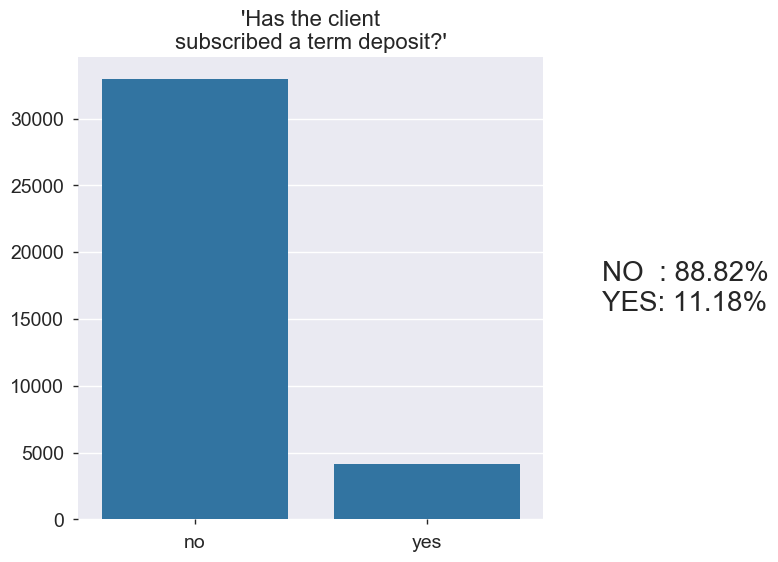

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(x="y", data=data, ax=ax, color=cp[0])

ax.set_title("'Has the client\nsubscribed a term deposit?'", size=16)
ax.set_xlabel('')
ax.set_xticklabels(['no', 'yes'])
ax.set_ylabel('')
ax.tick_params(labelsize=14)

ax.text(
    1.75,
    ax.get_ylim()[1]/2, 
    f'NO  : {(1-(data["y"]).mean())*100:.2f}%\nYES: {((data["y"]).mean())*100:.2f}%',
    fontsize=20,
    va='center'
);

Percebe-se que o target de nosso dataset apresenta significativo desbalanceamento. Com isso, faz-se necessário ter especial atenção ao *recall* atingido pelo modelo.

### Dados Categóricos

In [6]:
data_cat = data.select_dtypes(include='object')
print(f'There are {data_cat.shape[1]} categorical features in the data set:')
for cat_feature in data_cat.columns[:]:
    print(f'  - {cat_feature:15}(cardinality: {len(data_cat[cat_feature].unique())})')

There are 10 categorical features in the data set:
  - job            (cardinality: 12)
  - marital        (cardinality: 4)
  - education      (cardinality: 8)
  - default        (cardinality: 3)
  - housing        (cardinality: 3)
  - loan           (cardinality: 3)
  - contact        (cardinality: 2)
  - month          (cardinality: 10)
  - day_of_week    (cardinality: 5)
  - poutcome       (cardinality: 3)


Nenhuma cardinalidade parece excessiva, de forma que não vamos tratar adicionalmente esse aspecto de nosso dataset.

Vamos buscar entender, na sequência, de forma individualizada como se comportam essas variáveis frente à proporção generalizada da variável resposta.

In [7]:
def plot_cat_prevalence(data, cat_feature, **kwargs):
    
    # data manipulation
    d = data.groupby(cat_feature).agg({'y': [np.mean, 'count']})
    d.columns = ["yes", "freq"]
    d['freq'] = d['freq']/d['freq'].sum()
    sort_by = kwargs.get('sort_by', 'freq')
    if sort_by:
        d.sort_values(by=sort_by, inplace=True)
        
#     if kwargs.get('sort_by_freq', True):
#         d.sort_values(by='freq', inplace=True)
    d *= 100

    #plotting
    kind=kwargs.get('kind', 'barh')
    figsize=kwargs.get('figsize', (5,7) if kind=='barh' else (7,5))
    ax = d.plot(kind=kind, figsize=figsize)
    if kwargs.get('xlim100', False):
        ax.set_xlim(0,100)
    
    # text
    ax.set_title(f'Category Prevalence: {cat_feature}', size=kwargs.get('title_size', 16))
    if kind == 'barh':
        ax.set_xlabel("%", size=kwargs.get('xlabel_size', 14))
        ax.set_ylabel("")
    elif kind == 'bar':
        ax.set_ylabel("%", size=kwargs.get('xlabel_size', 14))
        ax.set_xlabel("")
    ax.tick_params(labelsize=12)
    
    # aditional info
    if kwargs.get('target_line', True):
        if kind=='barh':
            ax.axvline((data["y"]).mean()*100, color='r', linestyle='--', label='%yes average')
        elif kind=='bar':
            ax.axhline((data["y"]).mean()*100, color='r', linestyle='--', label='%yes average')
    if kwargs.get('legend', True):
        ax.legend(loc=kwargs.get('legend_loc', (1.1,0)), fontsize=kwargs.get('legend_loc_size', 12))
    
    # salvando o gráfico
    if kwargs.get('savefig', False):
        ax.get_figure().savefig(kwargs.get('saveto', f'{cat_feature}.png'), bbox_inches='tight')

    return ax

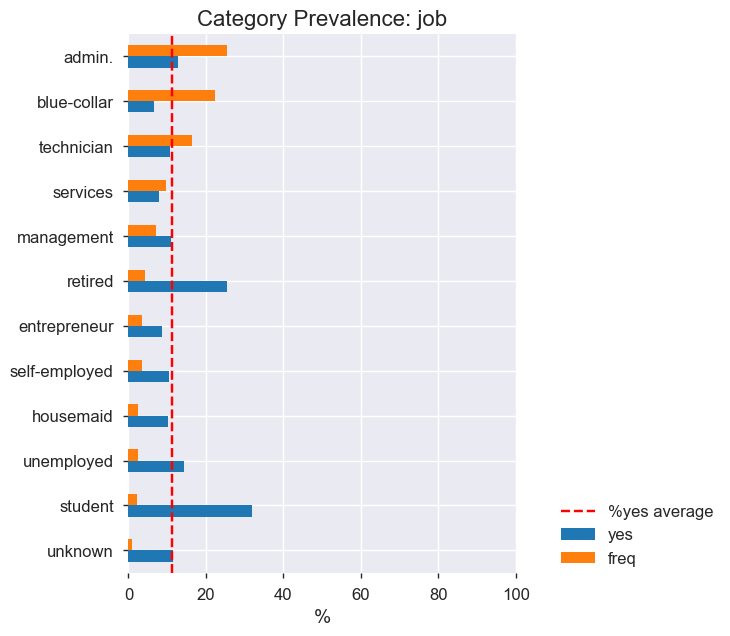

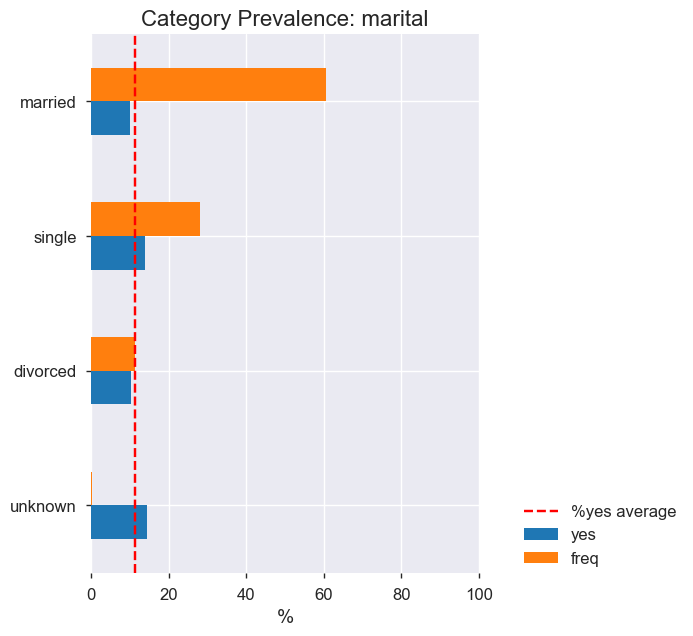

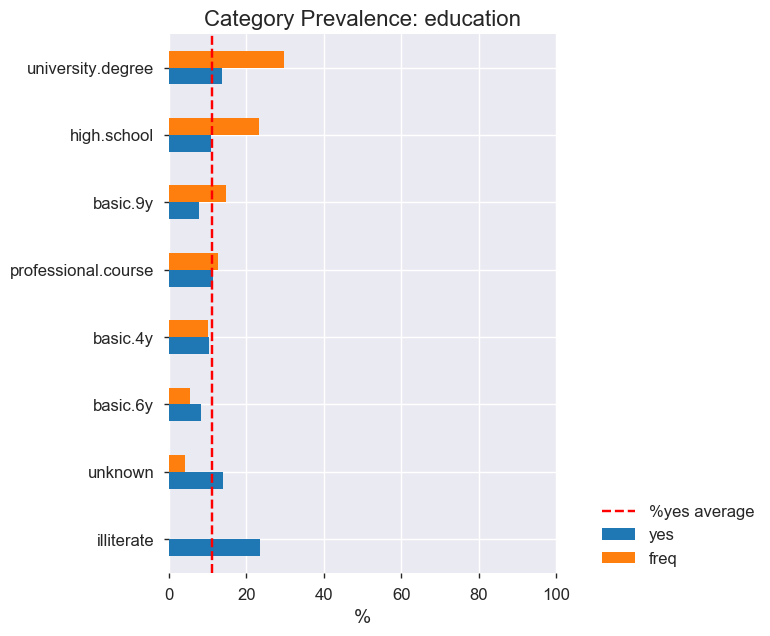

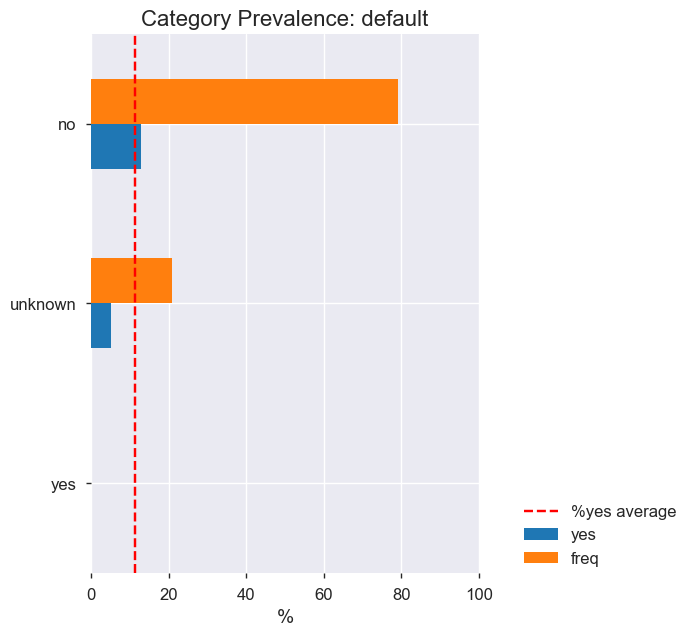

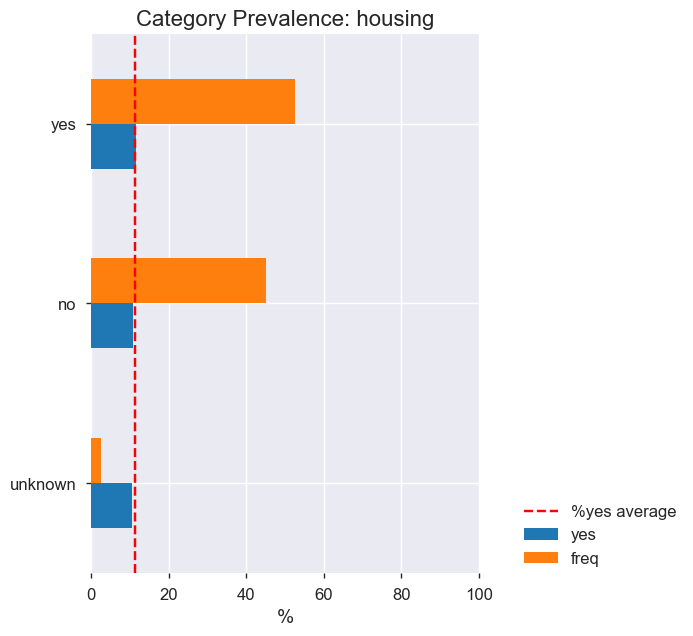

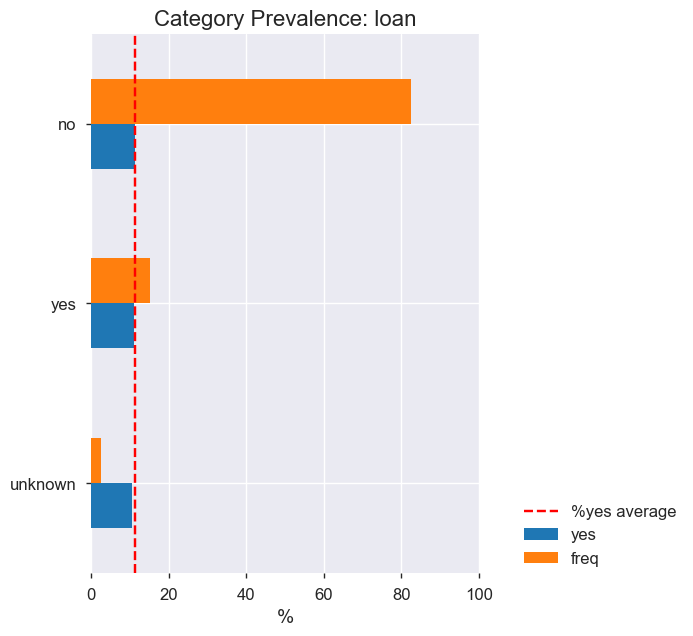

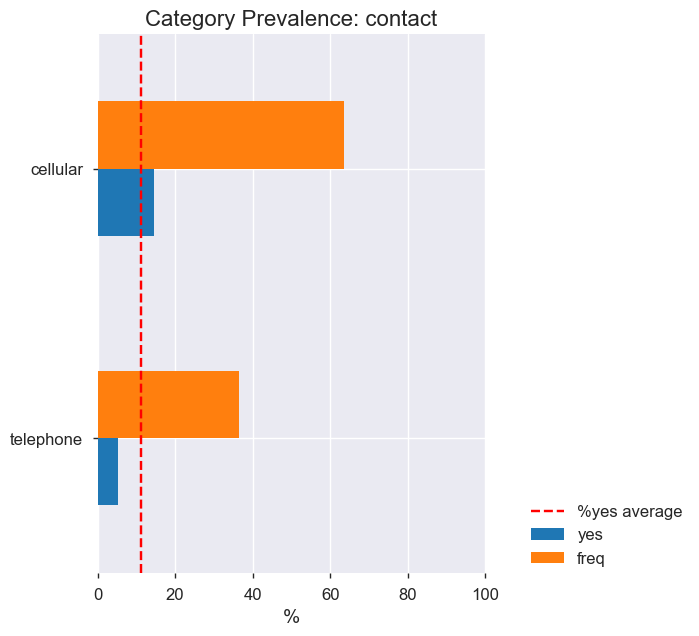

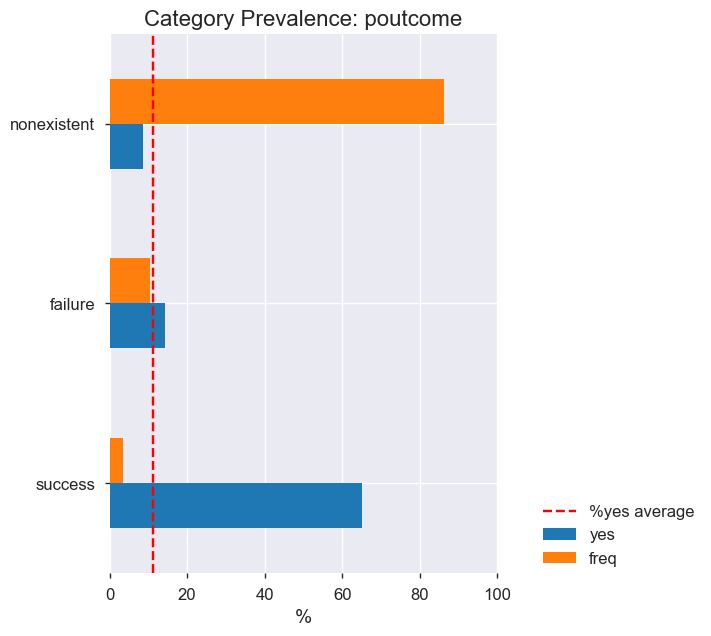

In [8]:
for cat_feature in data_cat.columns:
    if cat_feature not in ('month', 'day_of_week'): # temporal data requires different approach
        plot_cat_prevalence(data, cat_feature, xlim100=True, savefig=False)

In [9]:
# análise similar para dados de tempo
month_to_num = dict((v.lower(), k) for k, v in enumerate(calendar.month_abbr) if v)
day_of_week_to_num = dict((v.lower(), k) for k, v in enumerate(calendar.day_abbr) if v)
data_tempo = data[['month', 'day_of_week', 'y']]
data_tempo['month'] = data_tempo['month'].map(month_to_num)
data_tempo['day_of_week'] = data_tempo['day_of_week'].map(day_of_week_to_num)

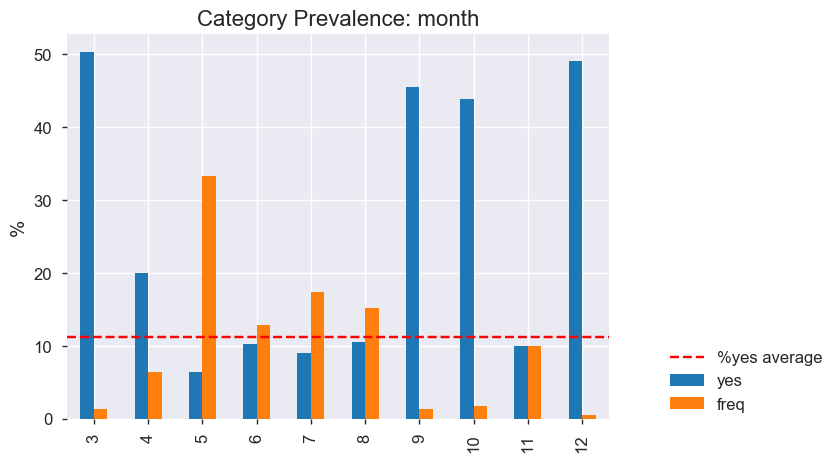

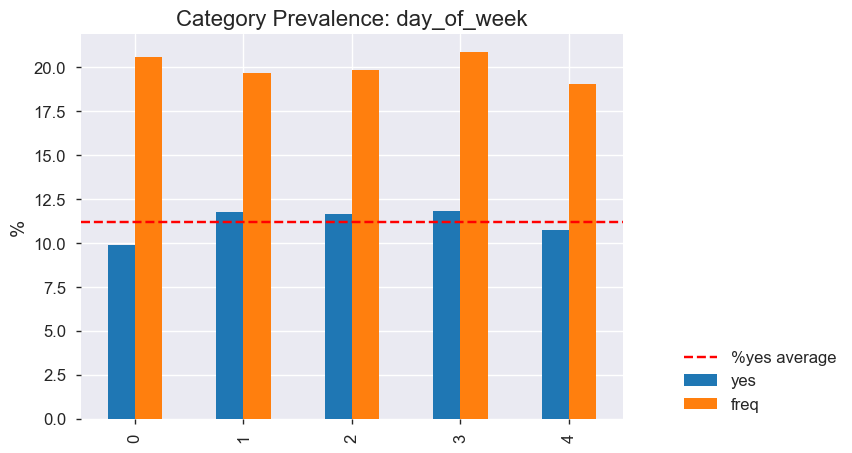

In [10]:
ax = plot_cat_prevalence(
    data_tempo, 
    'month', 
    kind='bar', 
    sort_by=None
)

ax = plot_cat_prevalence(
    data_tempo, 
    'day_of_week', 
    kind='bar', 
    sort_by=None
)

### Dados Numéricos

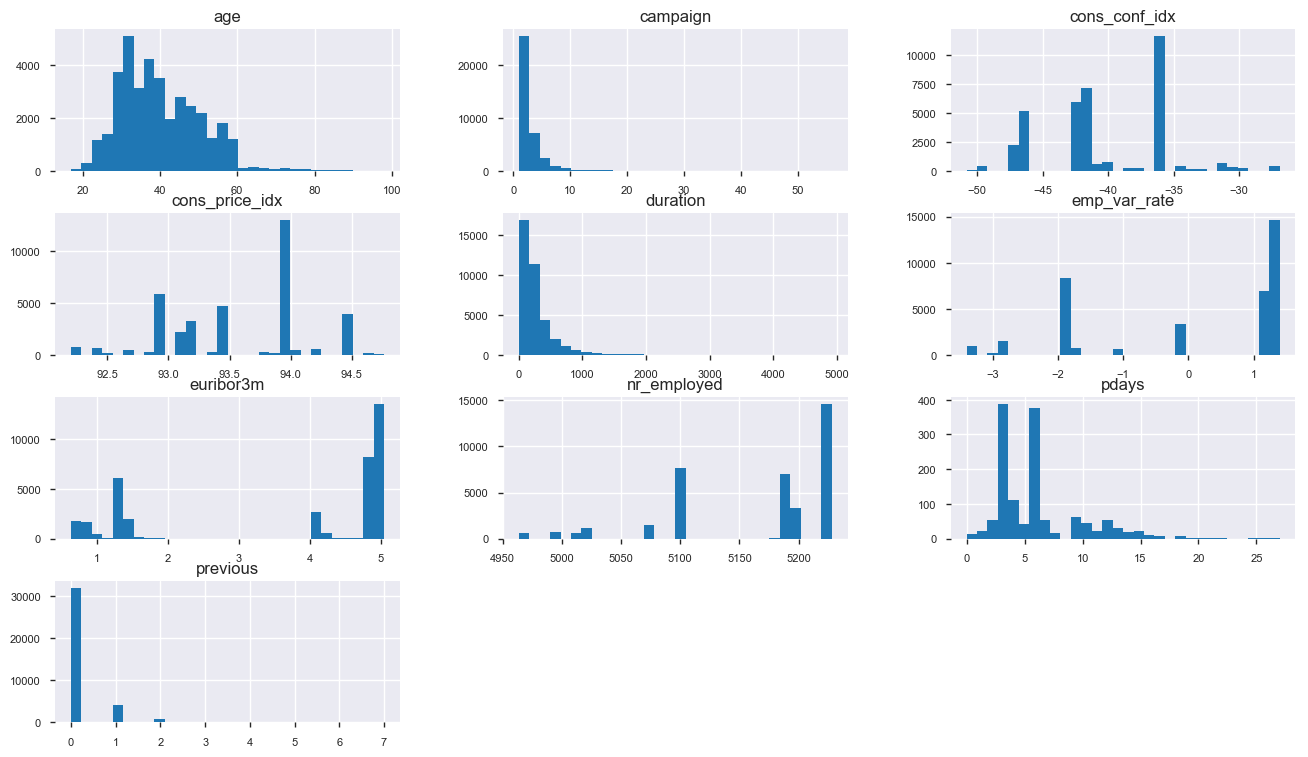

In [11]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.loc[data_num['pdays'] == 999, 'pdays'] = np.nan # tratamento necessário exclusivamente pelo grande número de valores 999 nessa variável
data_num.drop('y', axis=1).hist(bins=30, xlabelsize=8, ylabelsize=8, figsize=(16, 9), layout=(4,3));

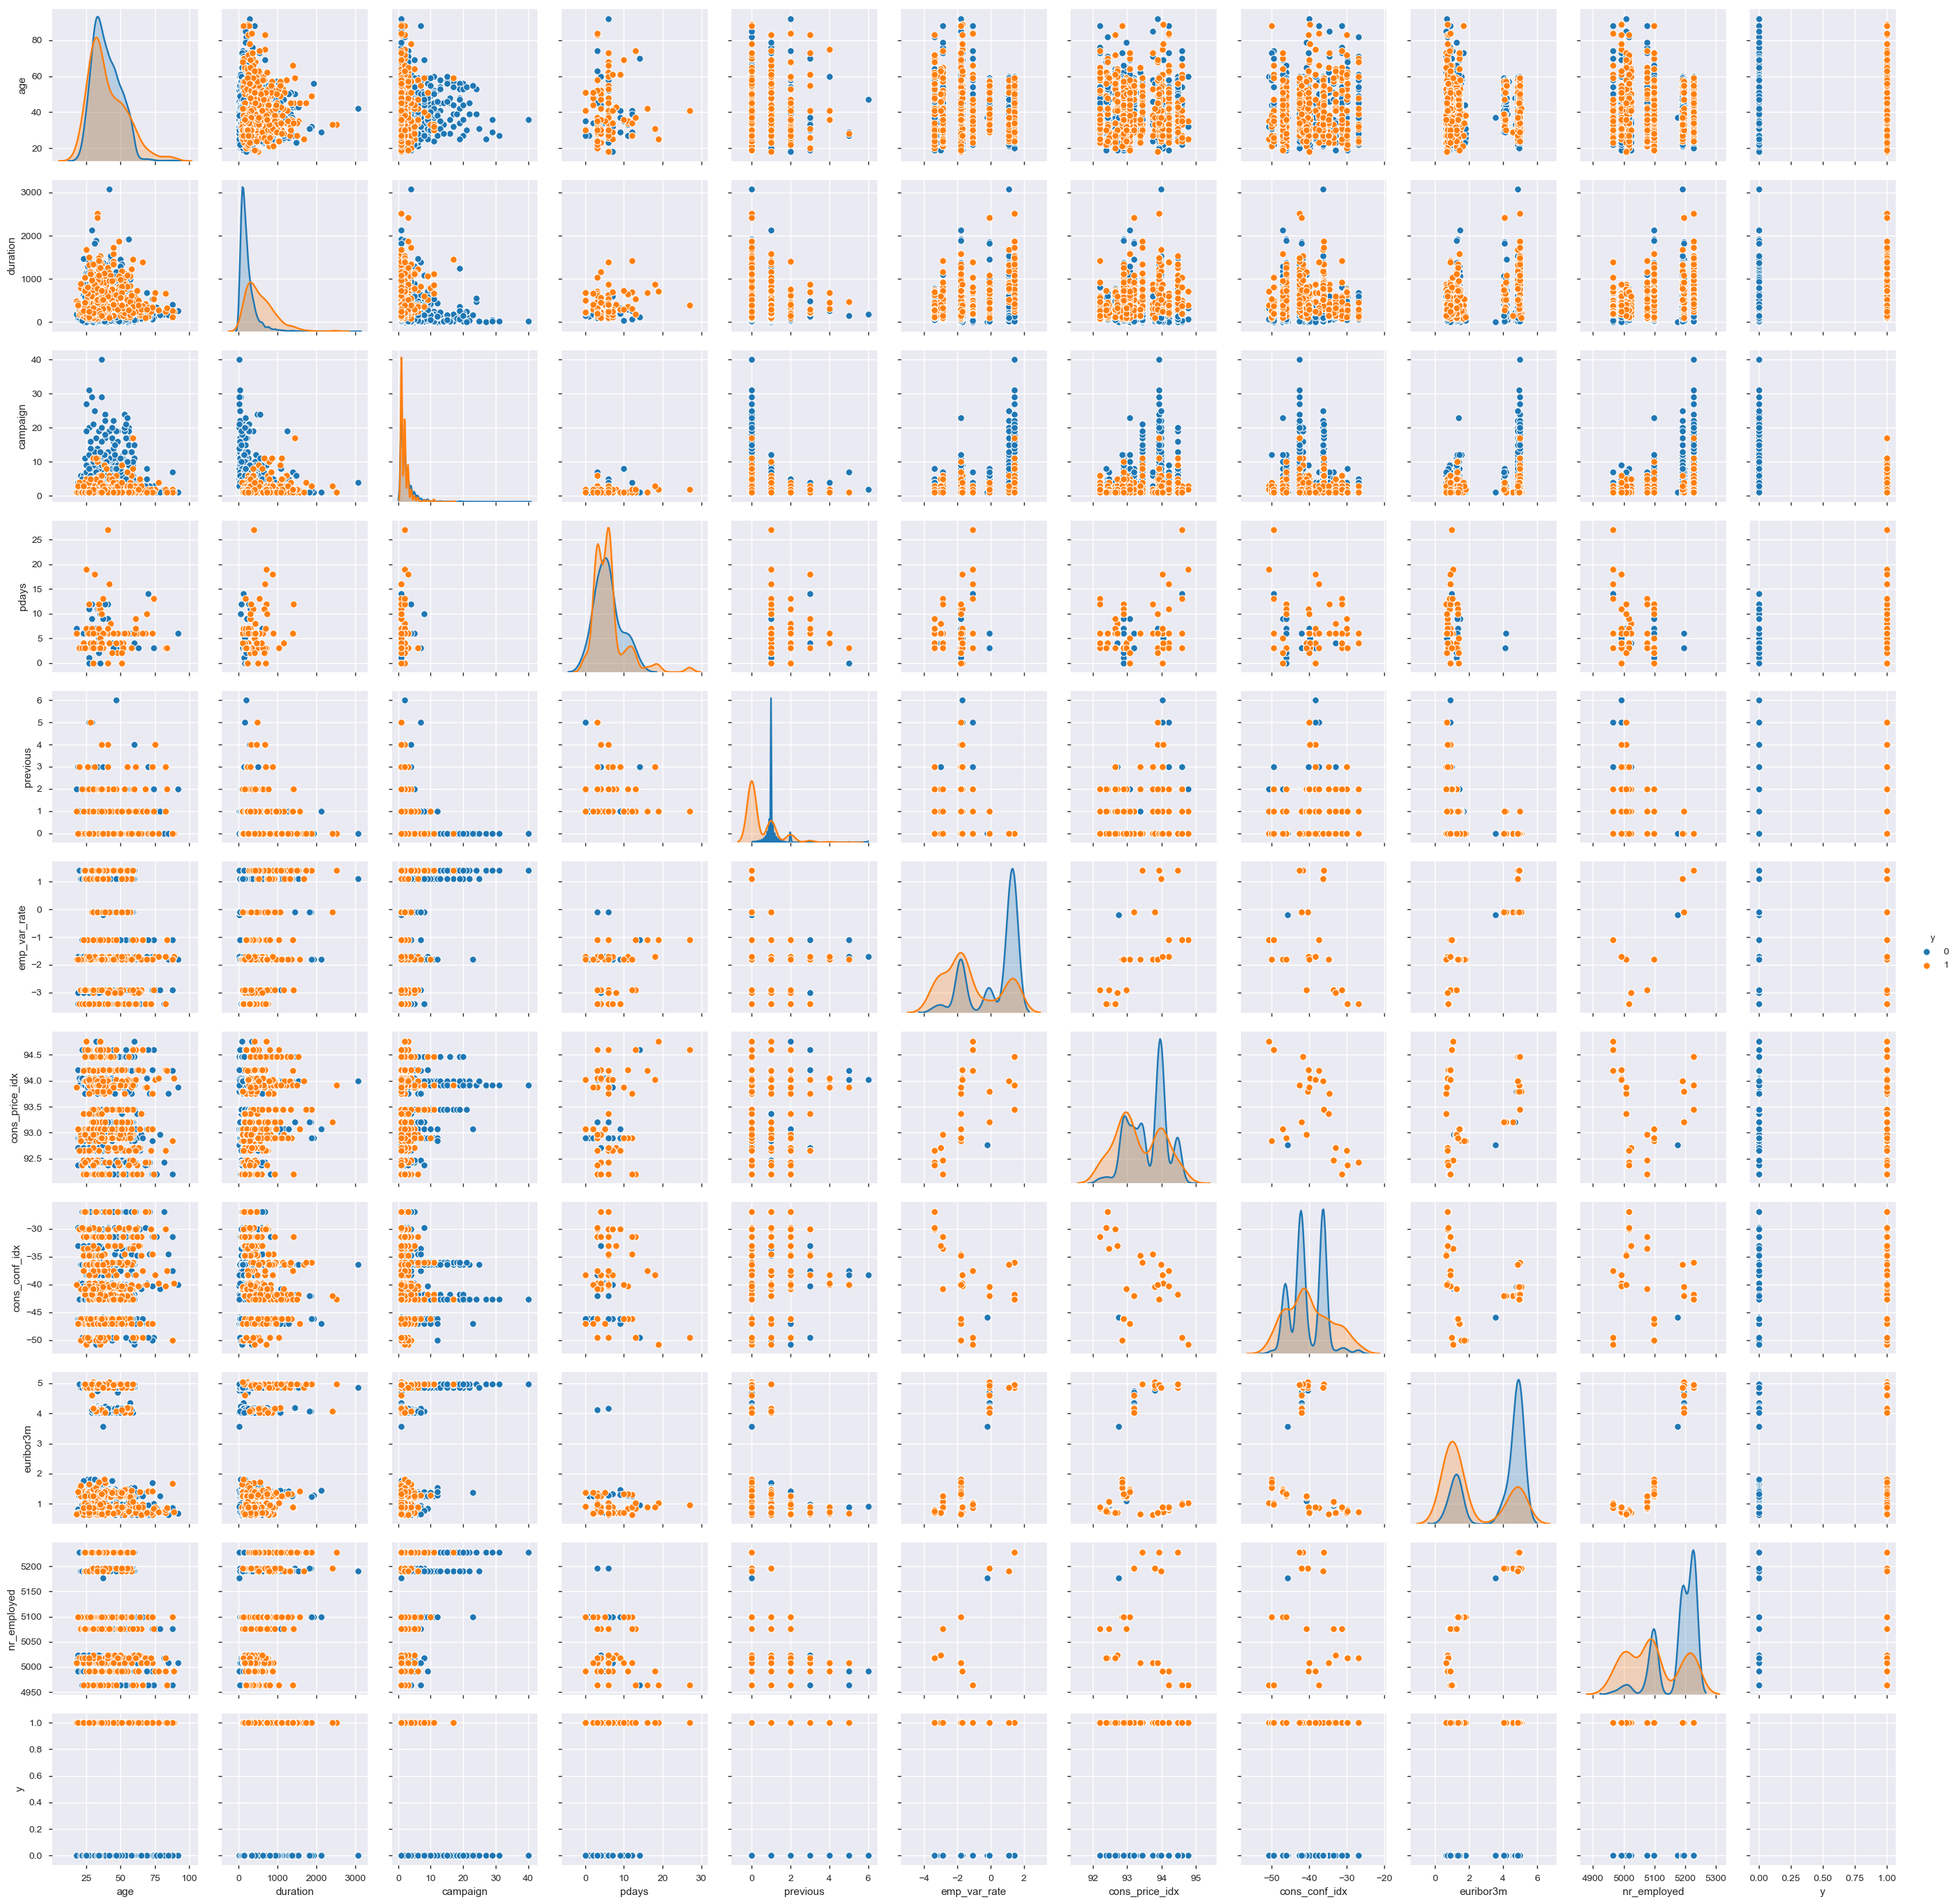

In [12]:
sns.pairplot(data_num.sample(frac=0.1), hue='y')

Text(0.5,0.98,'Kernel Density Estimation')

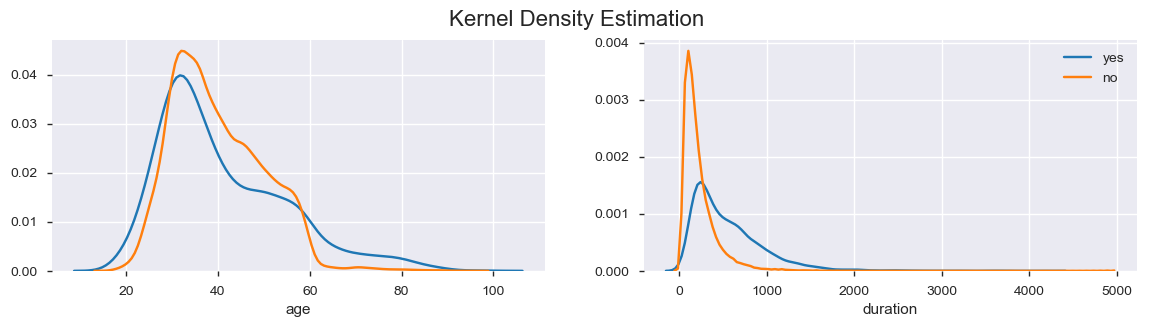

In [13]:
dad = data_num[['age', 'duration', 'y']]
fig, ax = plt.subplots(1, 2, figsize=(14,3))
ax[0] = sns.distplot(data_num.loc[dad['y']==1, 'age'], ax=ax[0], bins=30, hist=False)
ax[0] = sns.distplot(data_num.loc[dad['y']!=1, 'age'], ax=ax[0], bins=30, hist=False)
ax[1] = sns.distplot(data_num.loc[data_num['y']==1, 'duration'], ax=ax[1], bins=30, label='yes', hist=False)
ax[1] = sns.distplot(data_num.loc[data_num['y']!=1, 'duration'], ax=ax[1], bins=30, label='no', hist=False)
ax[1].legend(loc='best')
fig.suptitle('Kernel Density Estimation', size=16)

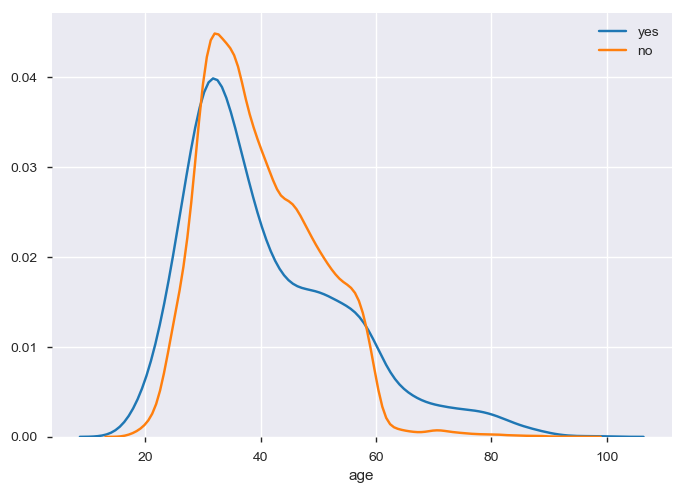

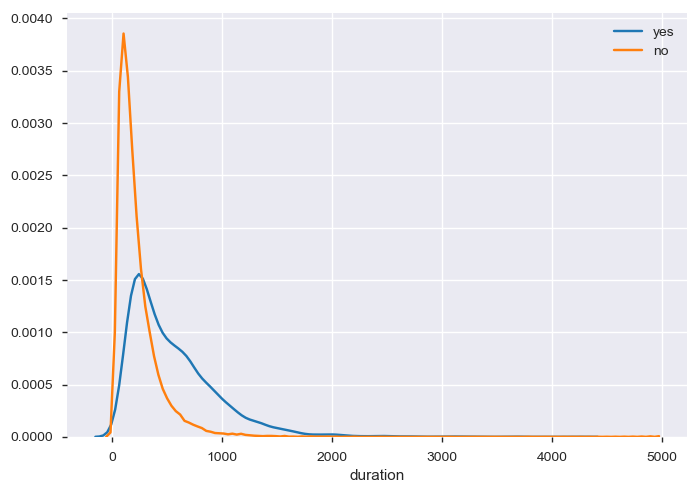

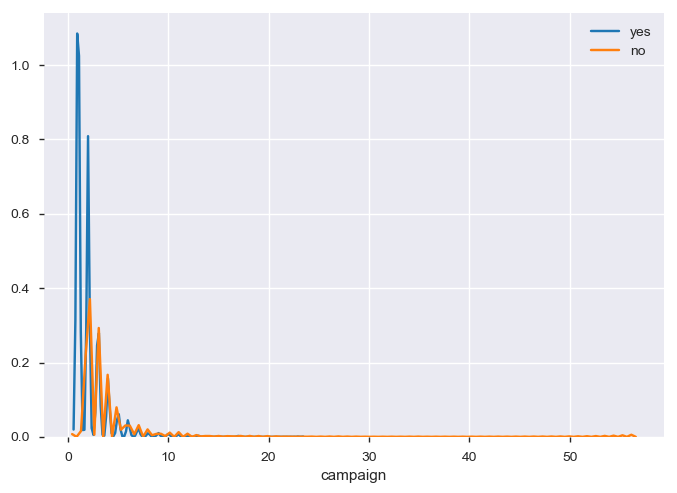

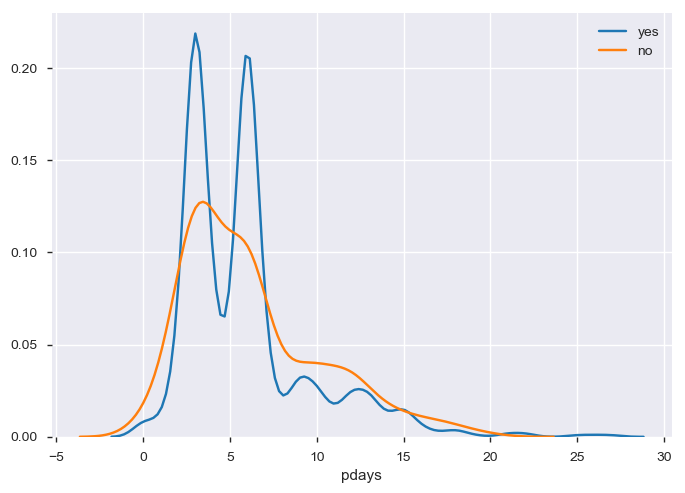

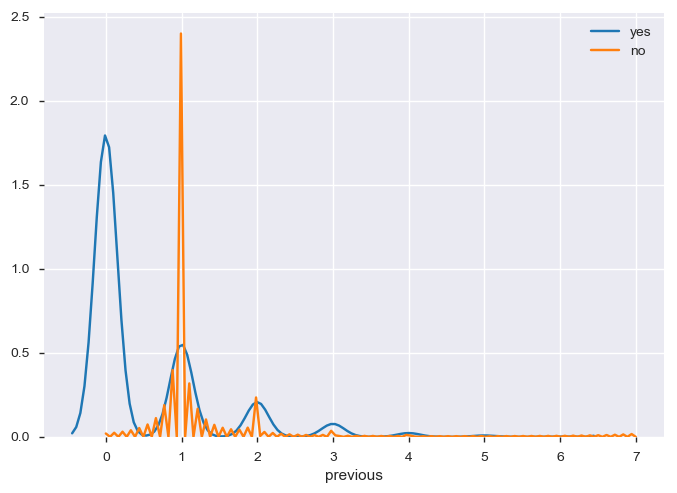

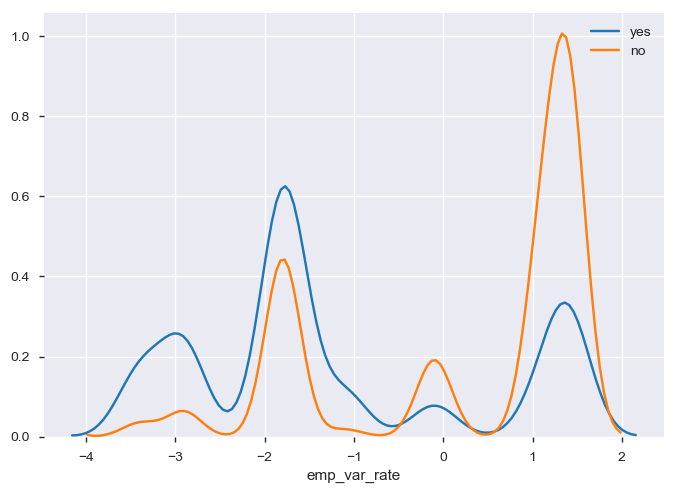

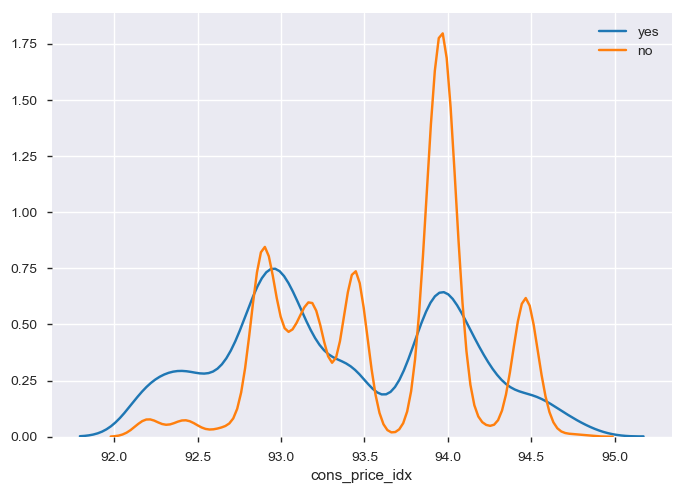

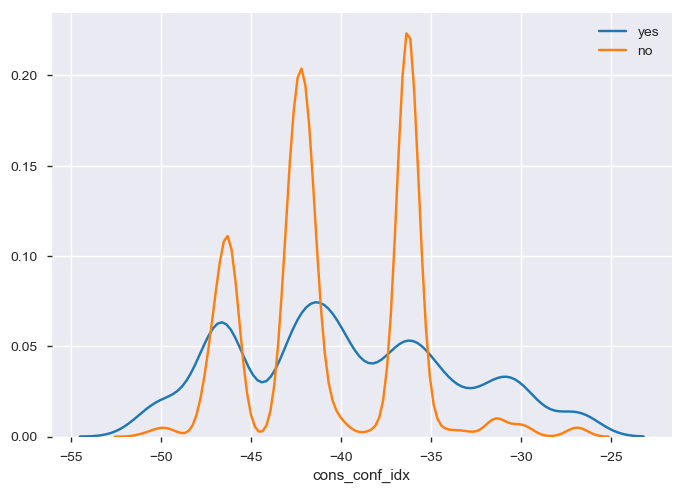

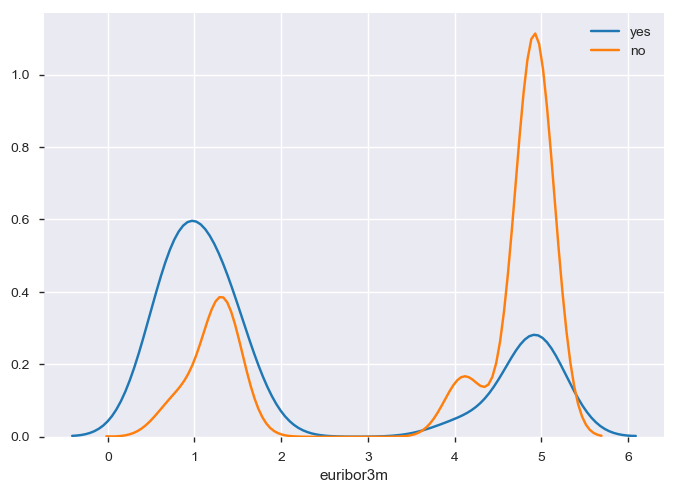

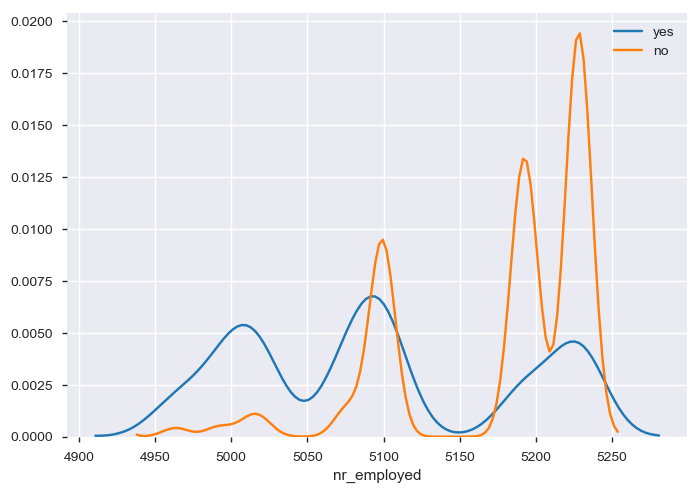

In [14]:
for c in data_num.columns:
    if not c == 'y':
        fig, ax = plt.subplots()
        ax = sns.distplot(data_num.loc[data_num['y']==1, c], ax=ax, bins=30, label='yes', hist=False)
        ax = sns.distplot(data_num.loc[data_num['y']!=1, c], ax=ax, bins=30, label='no', hist=False)
        ax.legend(loc='best')

### Modelagem

O próximo passo é buscar modelar nossa base para prever o sucesso da próxima ligação de venda.

In [15]:
data = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [16]:
X = pd.get_dummies(data.iloc[:,:-2].drop('duration', axis=1)) # duration só se sabe após o fim da ligação, assim não pode ser utilizada para fins preditivos
y = data['y'].map({'yes': 1, 'no': 0})

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

1. Regressão Logística

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat_proba = clf.predict_proba(X_test)

In [19]:
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             accuracy_score)

print(accuracy_score(y_test, y_hat))
print()
print(confusion_matrix(y_test, y_hat))
print()
print(classification_report(y_test, y_hat))

0.9049526584122359

[[7235   96]
 [ 687  220]]

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      7331
          1       0.70      0.24      0.36       907

avg / total       0.89      0.90      0.88      8238



2. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat_proba = clf.predict_proba(X_test)

In [21]:
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             accuracy_score)

print(accuracy_score(y_test, y_hat))
print()
print(confusion_matrix(y_test, y_hat))
print()
print(classification_report(y_test, y_hat))

0.8914785142024764

[[7084  247]
 [ 647  260]]

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      7331
          1       0.51      0.29      0.37       907

avg / total       0.87      0.89      0.88      8238



3. Gradient Boosting Machine

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat_proba = clf.predict_proba(X_test)

In [23]:
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             accuracy_score,
                             recall_score)

print(f'accuracy: {accuracy_score(y_test, y_hat):0.4f}')
print(f'recall  : {recall_score(y_test, y_hat):0.4f}')
print()
print(confusion_matrix(y_test, y_hat))
print()
print(classification_report(y_test, y_hat))

accuracy: 0.9053
recall  : 0.2723

[[7211  120]
 [ 660  247]]

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7331
          1       0.67      0.27      0.39       907

avg / total       0.89      0.91      0.89      8238



Os três modelos apresentaram resultados igualmente fracos, principalmente em termos de detectar os exemplos positivos, com recall abaixo de 0.3.

Na sequência, vamos eleger GBM para buscar melhores resultados por meio de ajustes de hiperparâmetros e técnicas de resampling.

In [24]:
# aumentando o número de estimadores para obtermos um baseline de alta profundidade
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat_proba = clf.predict_proba(X_test)[:, 1]
th = 0.1
y_hat_th = (y_hat_proba > th).astype(int)

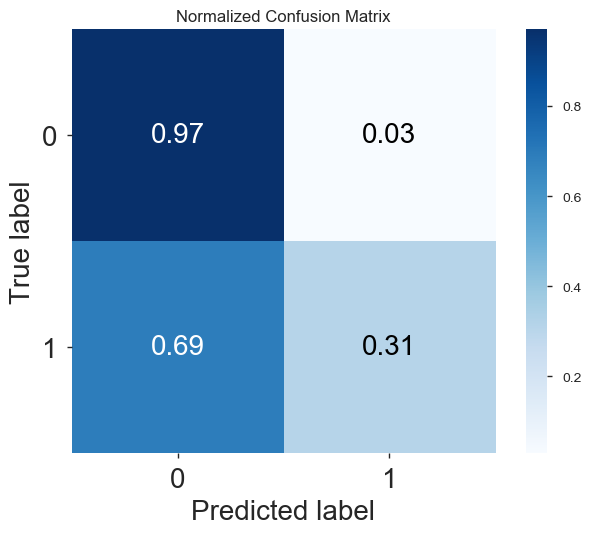

In [25]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_hat, text_fontsize=20, normalize=True)

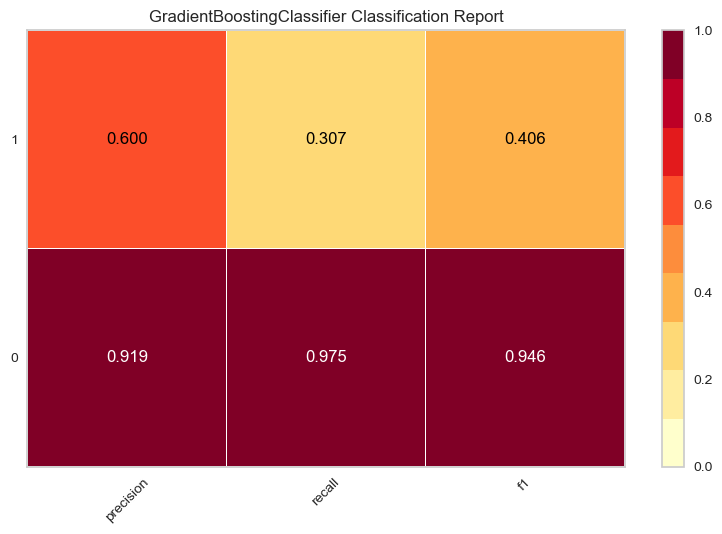

In [27]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(clf)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()     

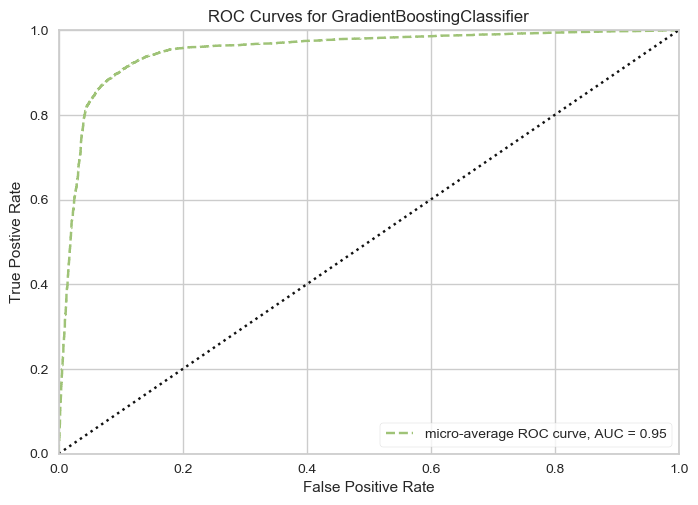

In [28]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf, macro=False, per_class=False)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

A curva ROC mostra que reduzindo o threshold para prever a classe positiva, podemos obter melhores valores de recall sem grandes sacrifício de acurácia.

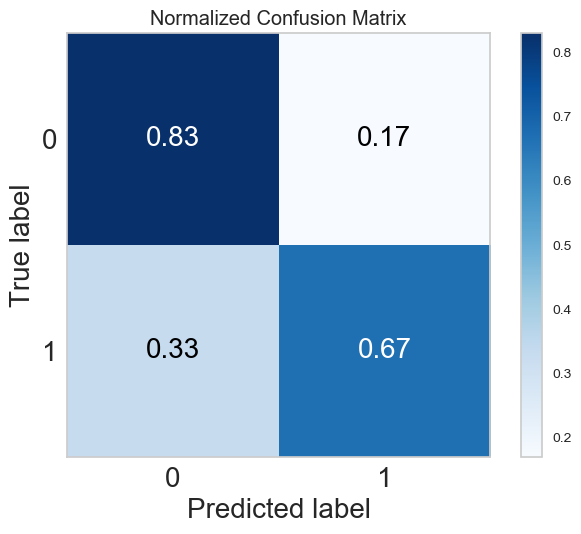

In [29]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_hat_th, text_fontsize=20, normalize=True)

In [30]:
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             accuracy_score,
                             recall_score)

print(f'accuracy: {accuracy_score(y_test, y_hat_th):0.4f}')
print(f'recall  : {recall_score(y_test, y_hat_th):0.4f}')

accuracy: 0.8146
recall  : 0.6736


Esse resultado já é bem mais interessante. Mas trabalhar com threshold móvel pode não ser o ideal em termos conceituais e na manipulação de dados com o Spark, que até a versão 2.1, não retornava `predict_proba` com o GBTClassifier.

Na sequência vamos buscar uma nova estratégia, utilizando resampling para amenizar o efeito do desbalanceamento da variável resposta.

SMOTE

In [31]:
X, X_ho, y, y_ho = train_test_split(X, y, test_size=0.2, random_state=420)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=420)

X_res, y_res = sm.fit_sample(X, y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=420)

In [34]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc_res = GradientBoostingClassifier(n_estimators=500)
gbc_res.fit(X_train_res, y_train_res)
y_hat_res = gbc_res.predict(X_test_res)
y_hat_ho = gbc_res.predict(X_ho)

print(f'accuracy: {accuracy_score(y_ho, y_hat_ho):0.4f}')
print(f'recall  : {recall_score(y_ho, y_hat_ho):0.4f}')
print()
print(confusion_matrix(y_ho, y_hat_ho))

accuracy: 0.9009
recall  : 0.3264

[[7126  205]
 [ 611  296]]
Wall time: 1min 32s


(0, 1)

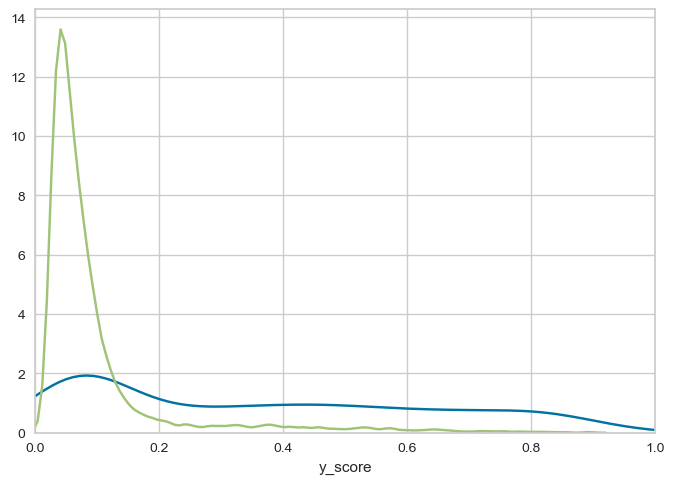

In [35]:
df_predictions = pd.DataFrame({
    'y_score': gbc_res.predict_proba(X_ho)[:, 1],
    'y': y_ho
})

fig, ax = plt.subplots()
ax = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=True, hist=False, bins=30, ax=ax)
ax = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=True, hist=False, bins=30, ax=ax)
ax.set_xlim(0,1)

Percebe-se a dificuldade deste modelo em separar entre as duas classes, mas ainda complicado de realmente ver o desequilíbrio das classes.

50   |  0.1     ok
50   |  0.01    ok
50   |  0.005   ok
50   |  0.001   ok
100  |  0.1     ok
100  |  0.01    ok
100  |  0.005   ok
100  |  0.001   ok
200  |  0.1     ok
200  |  0.01    ok
200  |  0.005   ok
200  |  0.001   ok
Wall time: 5min 3s


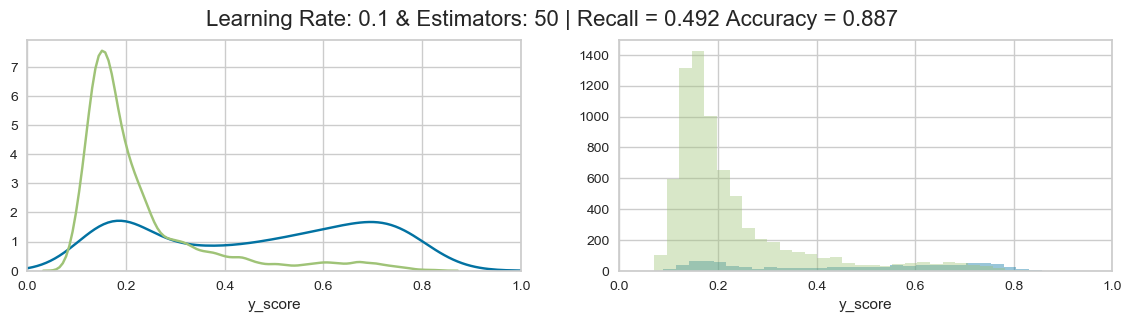

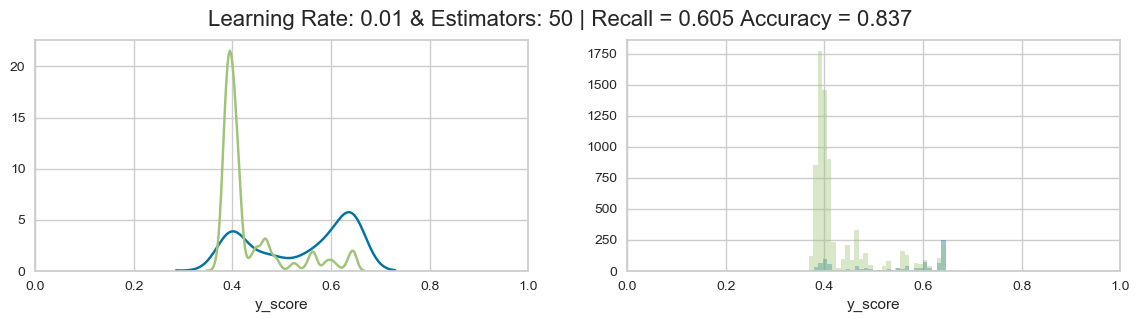

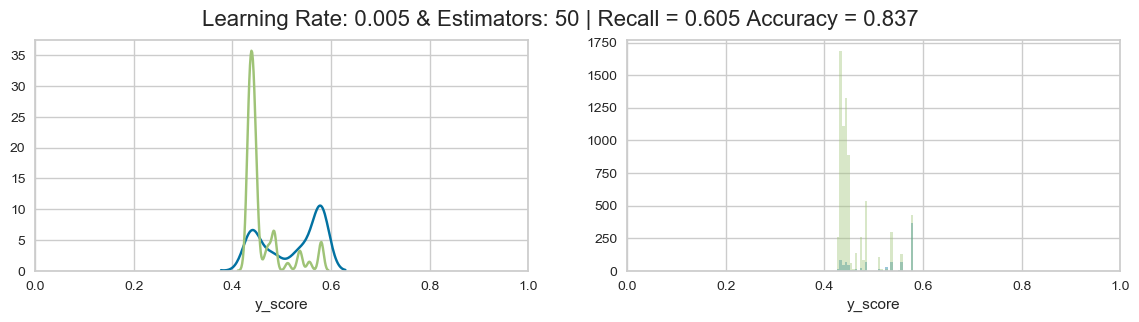

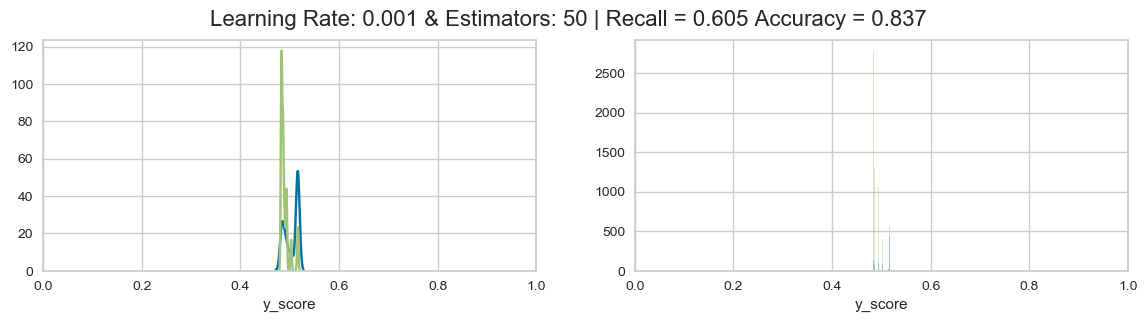

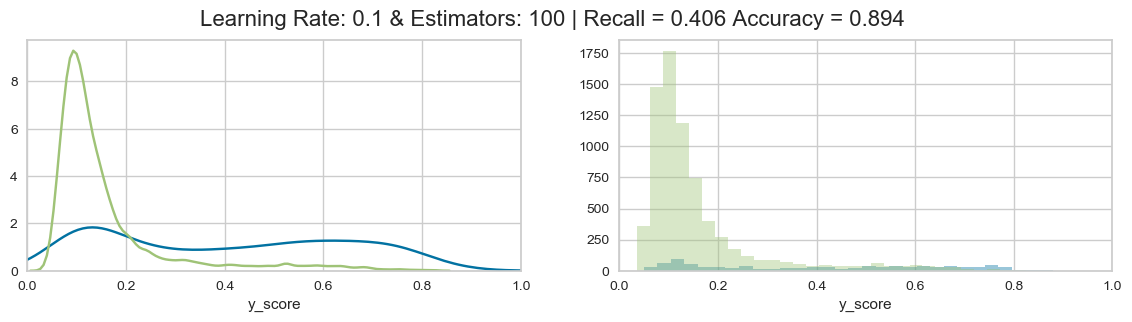

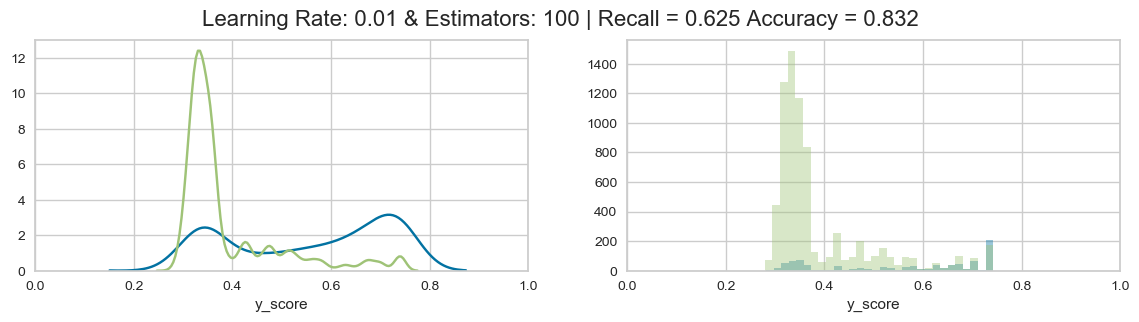

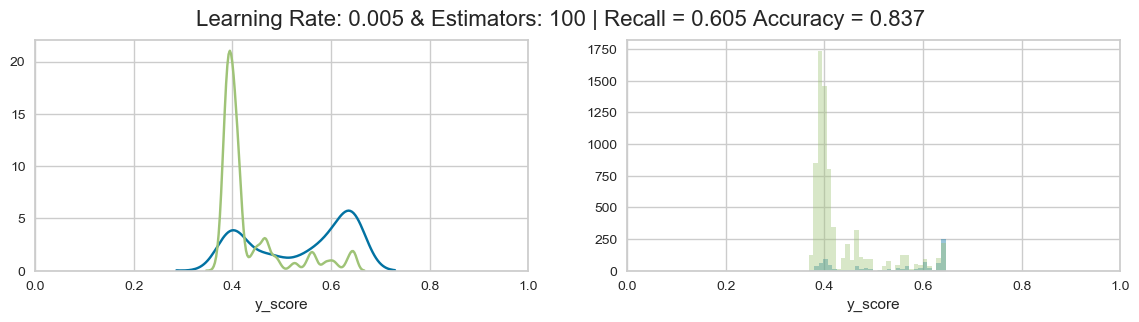

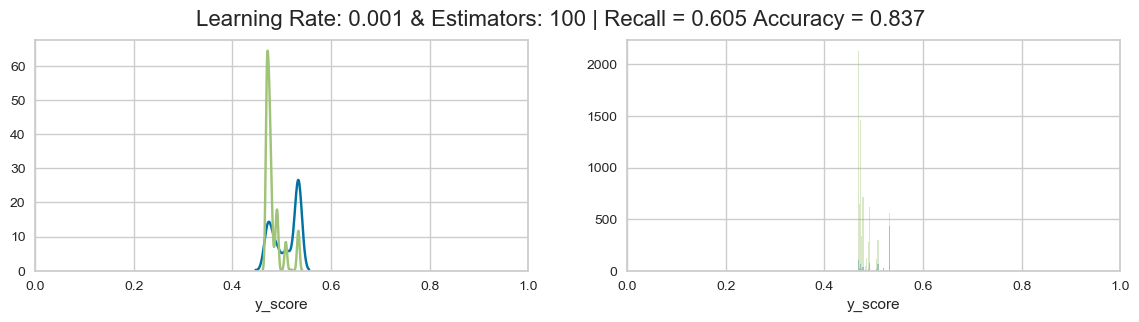

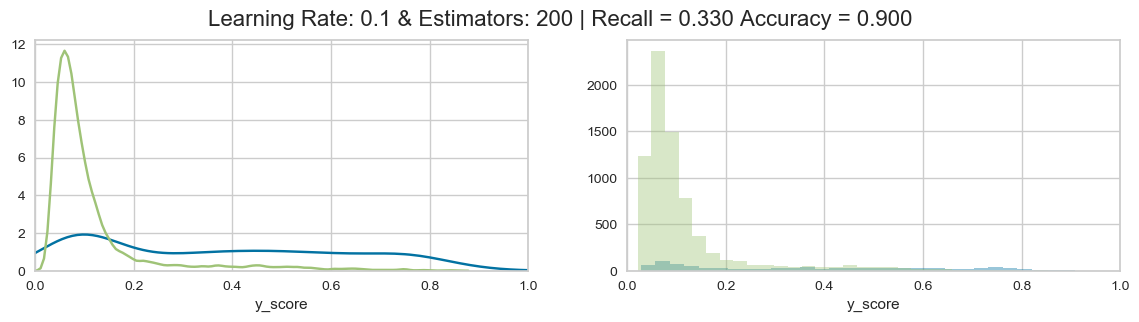

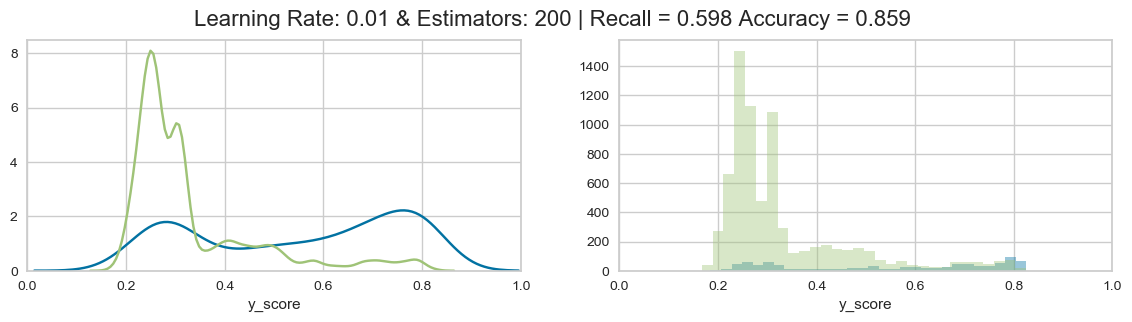

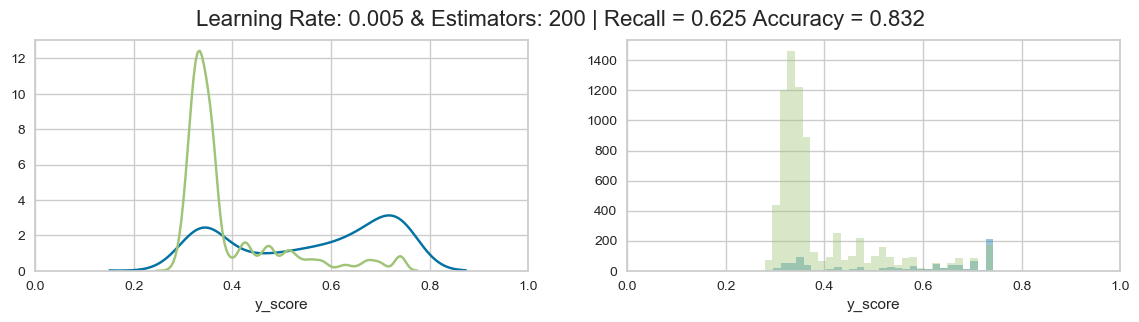

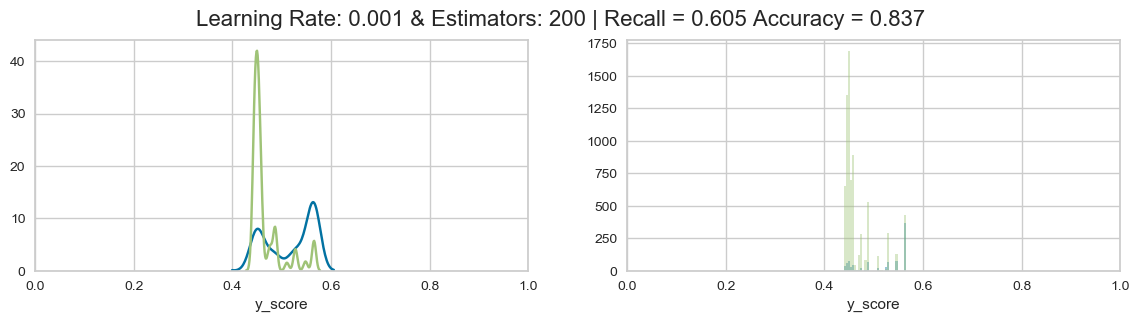

In [36]:
%%time

scores = {}

for n_estimators in [50,100,200]:
    for lr in [0.1, 0.01, 0.005, 0.001]:
        print(f'{n_estimators:<5}|  {lr:<8}', end='', flush=True)
        gbc_res = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr)
        gbc_res.fit(X_train_res, y_train_res)

        df_predictions = pd.DataFrame({
            'y_score': gbc_res.predict_proba(X_ho)[:, 1],
            'y': y_ho
        })

        accuracy = accuracy_score(y_ho, gbc_res.predict(X_ho))
        recall = recall_score(y_ho, gbc_res.predict(X_ho))
        scores[(n_estimators, lr)] = (recall, accuracy)
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))
        ax[0] = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=True, hist=False, bins=30, ax=ax[0])
        ax[0] = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=True, hist=False, bins=30, ax=ax[0])
        ax[0].set_xlim(0,1)

        ax[1] = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=False, hist=True, bins=30, ax=ax[1])
        ax[1] = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=False, hist=True, bins=30, ax=ax[1])
        ax[1].set_xlim(0,1)

        fig.suptitle(f'Learning Rate: {lr} & Estimators: {n_estimators} | Recall = {recall:.3f} Accuracy = {accuracy:.3f}', fontsize=16)
        print('ok')

In [37]:
sorted([(rec, acc, param) for param, (rec, acc) in scores.items()], reverse=True)[:3]

[(0.6251378169790518, 0.8319980577810148, (200, 0.005)),
 (0.6251378169790518, 0.8315125030347171, (100, 0.01)),
 (0.6052921719955898, 0.8374605486768634, (100, 0.005))]

Vamos utilizar portando os seguintes parâmetros:

    n_estimators = 100
    learning_rate = 0.01

É bastante interessante como n_estimators menores, ou um learning_rate menor (ambos parâmetros que acabam por reduzir o alcance do GBM) nos deu um melhor resultado.

Para tentar entender um pouco melhor esse comportamento, vamos plotar a evolução do recall e da acurácia com a alteração do learning_rate, mantendo o  constante em 0.01:

In [39]:
import time

In [40]:
%%time
t0 = time.time()
recall, accuracy = [], []
for lr in np.linspace(0.0001, 0.1, 50):
    tr = time.time()
    gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=lr)
    gbc_res.fit(X_train_res, y_train_res)
    
    y_hat = gbc_res.predict(X_ho)
    accuracy.append(accuracy_score(y_ho, y_hat))
    recall.append(recall_score(y_ho, y_hat))
    print(f'{f"{lr:.8f}":>10}  {recall[-1]:.4f}  {accuracy[-1]:.4f} {time.time()-tr:6.0f}" {time.time()-t0:6.0f}"')

0.00010000  0.5138  0.8762     17"     17"
0.00213878  0.6053  0.8371     18"     35"
0.00417755  0.6053  0.8375     20"     55"
0.00621633  0.6185  0.8337     21"     77"
0.00825510  0.6295  0.8258     20"     96"
0.01029388  0.6262  0.8315     19"    115"
0.01233265  0.6218  0.8410     17"    132"
0.01437143  0.6141  0.8501     16"    148"
0.01641020  0.6119  0.8512     16"    164"
0.01844898  0.5987  0.8579     15"    179"
0.02048776  0.5932  0.8617     15"    194"
0.02252653  0.5843  0.8676     15"    210"
0.02456531  0.5766  0.8713     15"    225"
0.02660408  0.5700  0.8714     15"    240"
0.02864286  0.5645  0.8744     15"    255"
0.03068163  0.5601  0.8755     15"    271"
0.03272041  0.5469  0.8784     15"    286"
0.03475918  0.5458  0.8808     15"    301"
0.03679796  0.5391  0.8813     15"    316"
0.03883673  0.5347  0.8825     15"    331"
0.04087551  0.5270  0.8841     15"    346"
0.04291429  0.5259  0.8848     17"    363"
0.04495306  0.5105  0.8855     16"    379"
0.04699184 

Text(0.5,0,'Learning Rate')

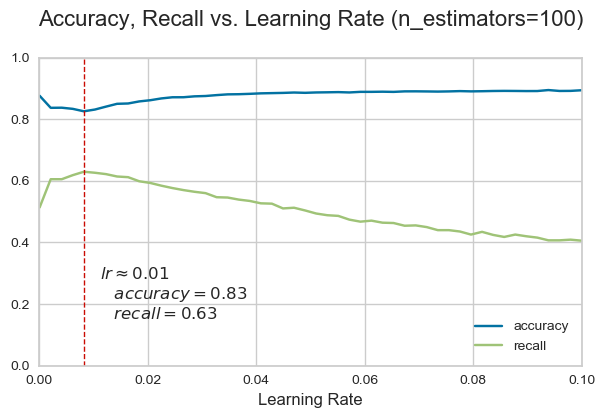

In [41]:
lr_max = np.linspace(0.0001, 0.1, 50)[np.argmax(np.array(recall))]
rcl_max = recall[np.argmax(np.array(recall))]
acc_max = accuracy[np.argmax(np.array(recall))]

fig, ax = plt.subplots(figsize=(7,4))
ax = sns.lineplot(x=np.linspace(0.0001, 0.1, 50), y=accuracy, label='accuracy')
ax = sns.lineplot(x=np.linspace(0.0001, 0.1, 50), y=recall, label='recall')
ax.set_ylim(0,1)
ax.set_xlim(0,0.1)

ax.axvline(lr_max, color='r', ls='--', lw=1)
ax.text(lr_max+0.003, 0.15, r'$lr \approx 0.01$'+'\n   '+r'$accuracy = 0.83$'+'\n   '+r'$recall = 0.63$', size=12)
ax.set_title('Accuracy, Recall vs. Learning Rate (n_estimators=100)\n', size=16)
ax.set_xlabel('Learning Rate', size=12)

In [51]:
%%time
t0 = time.time()
recall, accuracy = [], []
for nest in np.linspace(4, 200, 50):
    tr = time.time()
    gbc_res = GradientBoostingClassifier(n_estimators=int(nest), learning_rate=0.01)
    gbc_res.fit(X_train_res, y_train_res)
    
    y_hat = gbc_res.predict(X_ho)
    accuracy.append(accuracy_score(y_ho, y_hat))
    recall.append(recall_score(y_ho, y_hat))
    print(f'{f"{int(nest)}":>10}  {recall[-1]:.4f}  {accuracy[-1]:.4f} {time.time()-tr:6.0f}" {time.time()-t0:6.0f}"')

         4  0.6053  0.8371      1"      1"
         8  0.6053  0.8371      1"      2"
        12  0.6053  0.8371      2"      4"
        16  0.6053  0.8371      3"      7"
        20  0.6053  0.8371      4"     11"
        24  0.6053  0.8371      5"     15"
        28  0.6053  0.8371      5"     20"
        32  0.6053  0.8372      6"     27"
        36  0.6053  0.8373      6"     33"
        40  0.6053  0.8375      7"     40"
        44  0.6053  0.8375      8"     47"
        48  0.6053  0.8375      9"     56"
        52  0.6174  0.8354      9"     65"
        56  0.6174  0.8333      9"     74"
        60  0.6174  0.8333     10"     85"
        64  0.6185  0.8337     11"     95"
        68  0.6240  0.8308     11"    106"
        72  0.6284  0.8282     12"    118"
        76  0.6284  0.8286     13"    131"
        80  0.6295  0.8248     14"    145"
        84  0.6295  0.8273     19"    164"
        88  0.6262  0.8288     16"    180"
        92  0.6262  0.8293     17"    196"
        96 

Text(0.5,0,'Estimators')

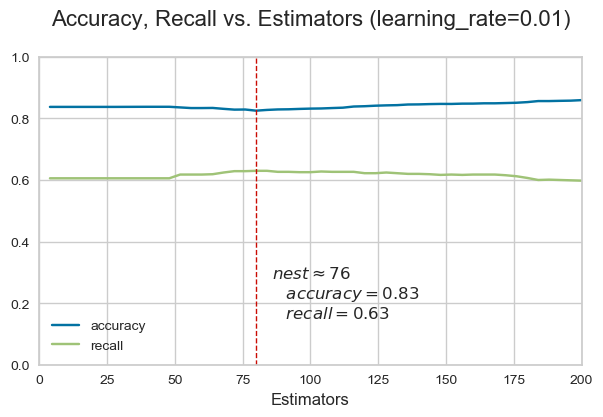

In [60]:
nest_max = int(np.linspace(4, 200, 50)[np.argmax(np.array(recall))])
rcl_max = recall[np.argmax(np.array(recall))]
acc_max = accuracy[np.argmax(np.array(recall))]

fig, ax = plt.subplots(figsize=(7,4))
ax = sns.lineplot(x=np.linspace(4, 200, 50), y=accuracy, label='accuracy')
ax = sns.lineplot(x=np.linspace(4, 200, 50), y=recall, label='recall')
ax.set_ylim(0,1)
ax.set_xlim(0,200)

ax.axvline(nest_max, color='r', ls='--', lw=1)
ax.text(nest_max+6, 0.15, r'$nest \approx 76$'+'\n   '+r'$accuracy = 0.83$'+'\n   '+r'$recall = 0.63$', size=12)
ax.set_title('Accuracy, Recall vs. Estimators (learning_rate=0.01)\n', size=16)
ax.set_xlabel('Estimators', size=12)

Parâmetros eleitos por fim:

    n_estimators = 100
    learning_rate = 0.0082

In [61]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=0.0082551)
gbc_res.fit(X_train_res, y_train_res)

Wall time: 22.2 s


In [62]:
y_hat_res = gbc_res.predict(X_test_res)
y_hat_ho = gbc_res.predict(X_ho)

In [65]:
print(f'accuracy: {accuracy_score(y_ho, y_hat_ho):0.4f}')
print(f'recall  : {recall_score(y_ho, y_hat_ho):0.4f}')

accuracy: 0.8258
recall  : 0.6295


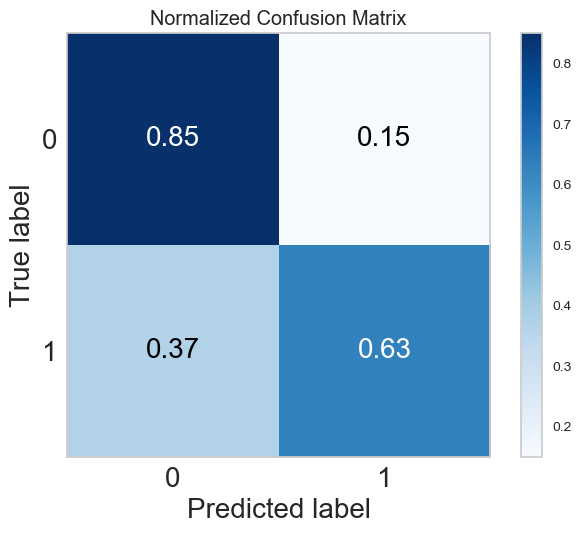

In [63]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_ho, y_hat_ho, text_fontsize=20, normalize=True)

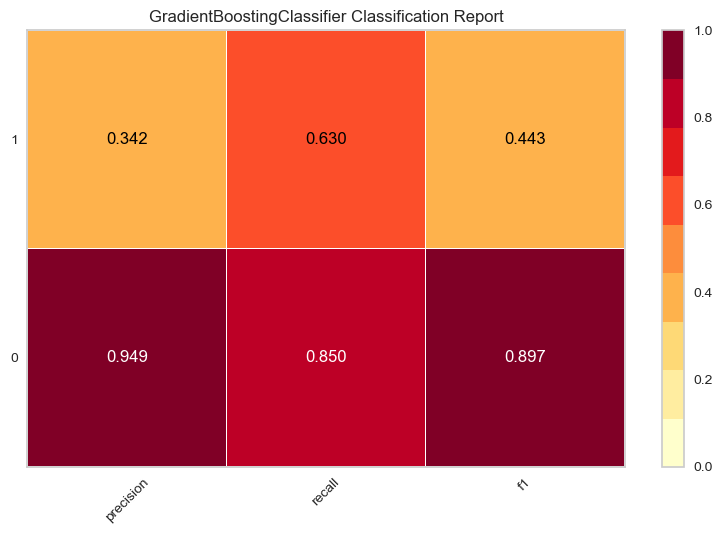

In [64]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(gbc_res)
visualizer.score(X_ho, y_ho)  # Evaluate the model on the test data
g = visualizer.poof()     

Text(0.5,0.98,'Learning Rate: 0.0082 & Estimators: 100 | Recall = 0.630 Accuracy = 0.826')

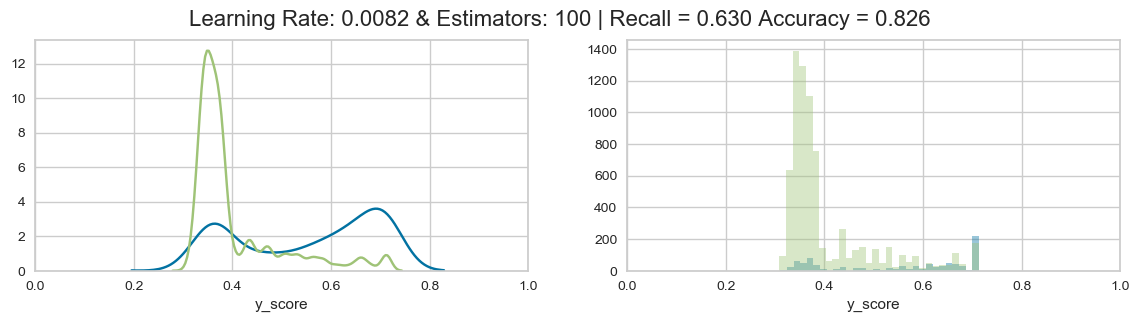

In [68]:
df_predictions = pd.DataFrame({
    'y_score': gbc_res.predict_proba(X_ho)[:, 1],
    'y': y_ho
})

accuracy = accuracy_score(y_ho, gbc_res.predict(X_ho))
recall = recall_score(y_ho, gbc_res.predict(X_ho))
scores[(n_estimators, lr)] = (recall, accuracy)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))
ax[0] = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=True, hist=False, bins=30, ax=ax[0])
ax[0] = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=True, hist=False, bins=30, ax=ax[0])
ax[0].set_xlim(0,1)

ax[1] = sns.distplot(df_predictions.loc[df_predictions['y']==1, 'y_score'], kde=False, hist=True, bins=30, ax=ax[1])
ax[1] = sns.distplot(df_predictions.loc[df_predictions['y']!=1, 'y_score'], kde=False, hist=True, bins=30, ax=ax[1])
ax[1].set_xlim(0,1)

fig.suptitle(f'Learning Rate: {0.0082} & Estimators: {100} | Recall = {recall:.3f} Accuracy = {accuracy:.3f}', fontsize=16)

In [58]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=0.0082551)
gbc_res.fit(X_train_res, y_train_res)
y_hat_res = gbc_res.predict(X_test_res)
y_hat_ho = gbc_res.predict(X_ho)

print(f'accuracy: {accuracy_score(y_ho, y_hat_ho):0.4f}')
print(f'recall  : {recall_score(y_ho, y_hat_ho):0.4f}')
print()
print(confusion_matrix(y_ho, y_hat_ho))

accuracy: 0.8258
recall  : 0.6295

[[6232 1099]
 [ 336  571]]
Wall time: 18.2 s


In [59]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc_res = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)
gbc_res.fit(X_train_res, y_train_res)
y_hat_res = gbc_res.predict(X_test_res)
y_hat_ho = gbc_res.predict(X_ho)

print(f'accuracy: {accuracy_score(y_ho, y_hat_ho):0.4f}')
print(f'recall  : {recall_score(y_ho, y_hat_ho):0.4f}')
print()
print(confusion_matrix(y_ho, y_hat_ho))

accuracy: 0.8315
recall  : 0.6251

[[6283 1048]
 [ 340  567]]
Wall time: 16.5 s
